- In X_train we are given 3 features of chemicals and we only have 2types of chemicals: type 0 and type 1. We will be given some training data and then we have to predict the type of chemical for our testing data

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

## 1. Data Preparation:

In [2]:
X_train = pd.read_csv("./Logistic_X_Train.csv")
y_train = pd.read_csv("./Logistic_Y_Train.csv")

X_train = X_train.values  # convert into numpy arrays as numpy arrays are easy to work woth
y_train = y_train.values

X_train.shape, y_train.shape

((3000, 3), (3000, 1))

- here we have 3 features in X_train and 3000 data samples. And y_train is 2d. So we need to convert it to 1D bcoz sklearn takes y_train as 1d array input

In [23]:
y_train = y_train.reshape((-1,))
y_train.shape

(3000,)

## 2. Data Visualization or EDA
- EDA means Exploratory Data Analysis

In [8]:
u = X_train.mean(axis=0)
std = X_train.std(axis=0)
print(u, std, sep='\n')

[0.00745338 0.99928635 0.02948714]
[1.33391527 1.02368243 1.20935638]


- Data is not normalized, so we can normalize the data first:

In [9]:
## Normalizing data

X_train = (X_train-u)/std
print(X_train.mean(axis=0))
print(X_train.std(axis=0))

[ 9.47390314e-18 -4.50010399e-17 -1.65793305e-17]
[1. 1. 1.]


- Now our data is normalized

In [10]:
plt.style.use('seaborn')

In [20]:
%matplotlib notebook

<IPython.core.display.Javascript object>


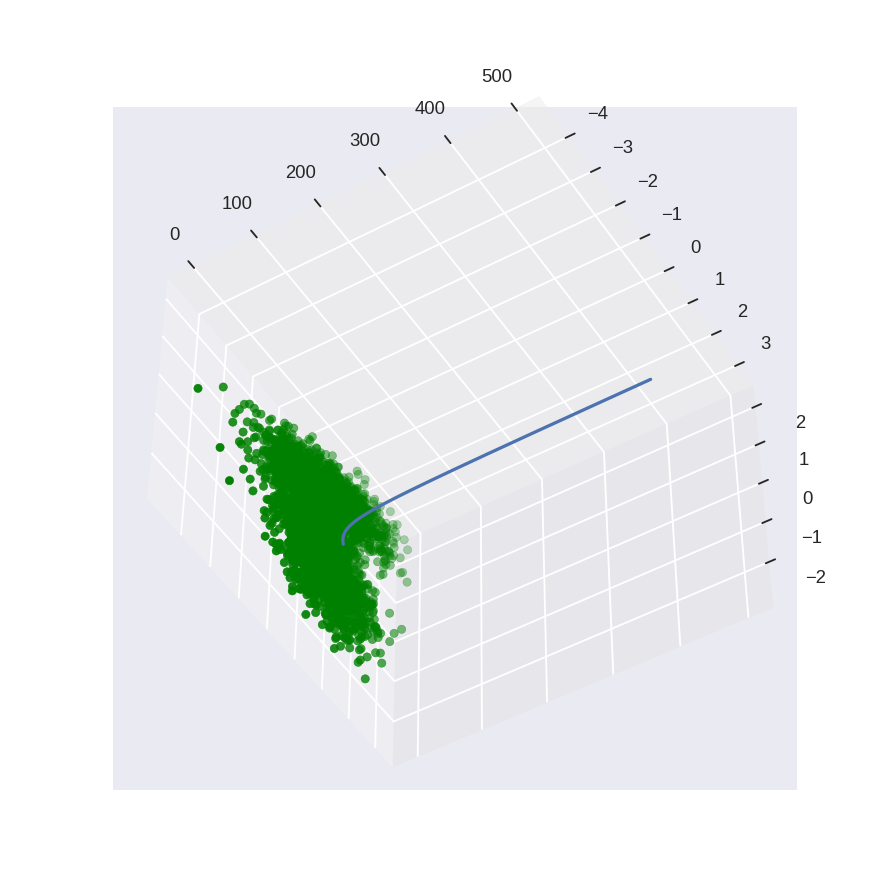

In [22]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection='3d')  # to create a 3d plot
ax.scatter3D(X_train[:,0], X_train[:,1], X_train[:,2], color="green")
plt.show()

- If we rotate this figure, then we can see that 2different plane clusters are there in 3d as we have 3features here. Here x-axis is 1st feature, y-axis is 2nd feature and z-axis is 3rd feature.
- Now we need to generate a hyperplane which will seperate these 2 clusters. Equation of that hyperplane will be: $\theta^TX$=0 => $\theta_0+\theta_1x_1+\theta_2x2+\theta_3x_3$=0
- We can't visualize data if we have more than 3 features.

## Predict using sklearn:

In [33]:
X_test = pd.read_csv("./Logistic_X_Test.csv")

X_test = X_test.values
X_test.shape

(1000, 3)

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_pred = model.predict(X_test)
print(y_pred[:5])

[1 1 0 1 1]


In [37]:
## convert to dataframe and then to csv file.
df = pd.DataFrame(y_pred, columns=["label"])
df.head()

label
0      1
1      1
2      0
3      1
4      1

In [38]:
df.to_csv("Output.csv", index=False)

In [40]:
model.score(X_train, y_train)   # check accuracy for training data.

0.9953333333333333

- We can't check accuracy for testing data as we do not have y_test with us.

## Visualize Decision Surface
- We can also visualize decision surface which is hyperplane if we want.
- But for that we need to generate some random values of $x_1$ , $x_2$ and then find $x_3$ as function od $x_1$ and $x_2$

equation of plane: $\theta_0+\theta_1x_1+\theta_2x_2\theta_3x_3=0$ 

=> $x_3= -(\theta_0+\theta_1x_1+\theta_2x_2)/\theta_3$

In [42]:
# generate theta from sklearn model
theta = np.zeros((X_test.shape[1]+1,))
theta[0] = model.intercept_
theta[1:] = model.coef_

In [45]:
x1 = np.arange(-3,4)  # last value is excluded
x2 = np.arange(-3,4)
x1,x2 = np.meshgrid(x1,x2)  # x1 and x2 are same size matrices which create base of meshgrid

x3 = -(theta[0] + theta[1]*x1 + theta[2]*x2)/theta[3] # x3 gives height to each point in meshgrid

<IPython.core.display.Javascript object>


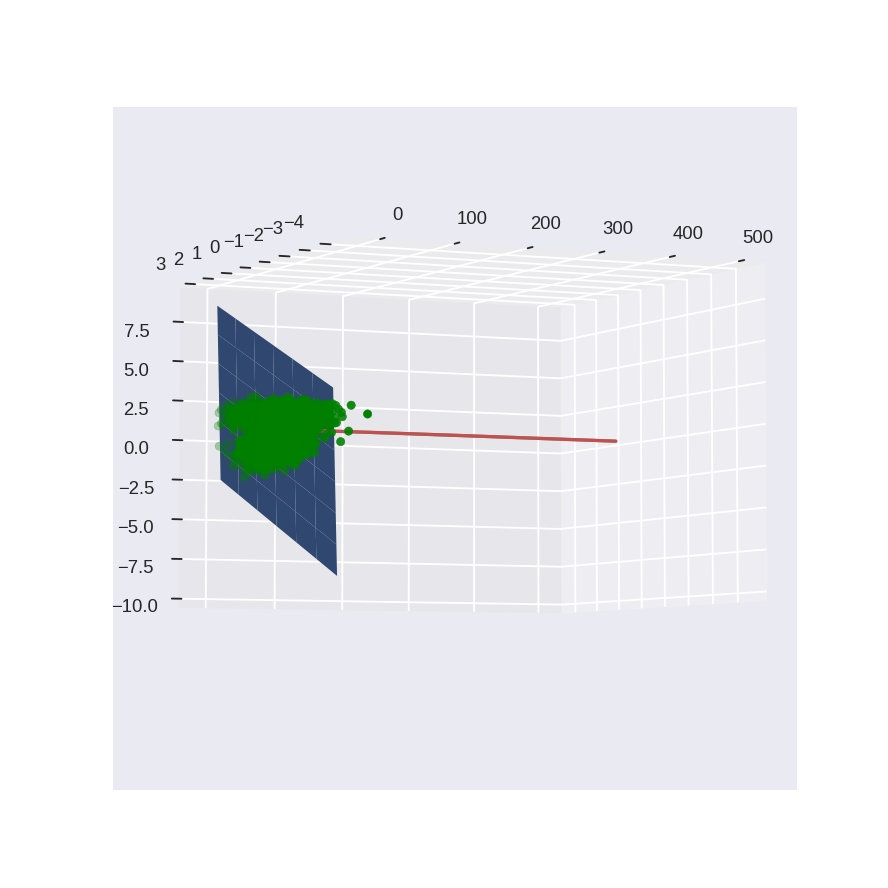

In [46]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection='3d')  # to create a 3d plot
ax.scatter3D(X_train[:,0], X_train[:,1], X_train[:,2], color="green")

ax.plot_surface(x1,x2,x3,)
plt.show()

- This is our hyperplane seperating 2 clusters

## User-defined function:
- We can also use user defined function for above process.

In [48]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

def hypothesis(X, theta):
    ## X - entire array of size (m, n+1)
    ## theta - np.array(n+1,1)
    h = np.dot(X,theta)
    return sigmoid(h)

def error(X, y, theta):
    ## X - (m,n+1)  and  y - (m,1)  and  theta - (n+1,1)
    hi = hypothesis(X,theta)
    e = -1*np.mean( y*np.log(hi) + (1-y)*np.log(1-hi) )
    
    return e

def gradient(X, y, theta):
    ## X - (m,n+1)  and  y - (m,1)  and  theta - (n+1,1)
    hi = hypothesis(X, theta)
    grad = np.dot(X.T, (y-hi))
    m = X.shape[0]
    return grad/m

def gradient_Descent(X, y, lr=0.1, max_iter=500):
    n = X.shape[1]
    theta = np.zeros((n,1)) # create empty theta vector of size n not n+1 bcoz n is already 
                            # updated to n+1 in the below cell 
    
    error_list = []  # create an empty list to store error
    
    for i in range(max_iter):
        err = error(X, y, theta)
        error_list.append(err)
        
        grad = gradient(X, y, theta)
        theta = theta + lr*grad
        
    return theta, error_list 

In [49]:
X_new_train = np.hstack((np.ones((X_train.shape[0],1)), X_train))
y_new_train = y_train.reshape((-1,1))  # convert y from 1d to a 2d vector
theta, error_list = gradient_Descent(X_new_train, y_new_train)

In [50]:
print(theta)

[[-0.34767648]
 [-2.54073799]
 [ 1.38266256]
 [-2.30256859]]


- Now we can see error also. How it decreased and how much iteration it takes to reach saturation point:

- We had executed %matplotlib notebook command. Now matplotlib shows 3d plots inside jupyter notebook. But it is not showing anything else inside this jupyter notebook like plot(), scatter() etc..
- So we need to restart kernel and then execute this code

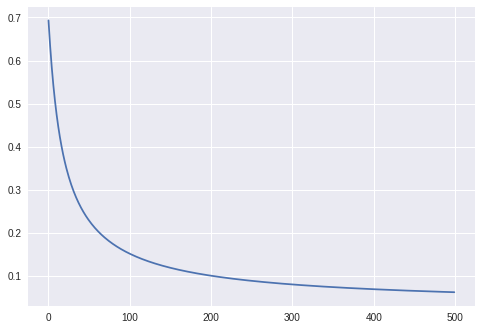

In [51]:
plt.plot(np.arange(len(error_list)), error_list)
plt.show()

- Now we can see that error decreased from 0.7 to arounf 0.05 and it come to saturation point after 500 iterations bcoz here lr=0.1. It will converge to minimum value faster if we use high learning rate.

In [55]:
## predictions
def predict(X, theta):
    h = hypothesis(X, theta)  # it gives us the confidence score for class1(in range 0 to 1)
    output = np.zeros((h.shape)) # create empty array of same size as h to store output
    
    # put output=1 if h>0.5 else don't do anything bcoz it is already 0 otherwise.
    output[h>0.5] = 1
    output = output.astype('int')  # convert to integer type as it is in float by default
    return output

In [56]:
X_new_test = np.hstack((np.ones((X_test.shape[0],1)), X_test))
pred = predict(X_new_test, theta)

- Now we can convert to csv file.

In [57]:
# we can make predictions for traininf data and check accuracy also
pred_train = predict(X_new_train, theta)
np.mean(pred_train == y_new_train)

0.9926666666666667

- We can see: It has 99.26% accuracy by our model also
- Now we can visualize the hyperplabe also